In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

# NLP libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score

In [0]:
review_df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')
review_df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [0]:
review_df.count()


Review    1000
Liked     1000
dtype: int64

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', review_df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [0]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).todense()
y = review_df.iloc[:,1].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state = 0)

In [0]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

Accuracy Score is : 0.73


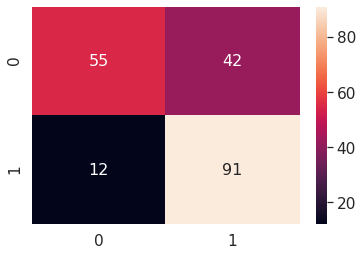

In [0]:
df_cm = pd.DataFrame(Confusion_Matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

## KNN **Classifier**

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

Accuracy Score is : 0.73


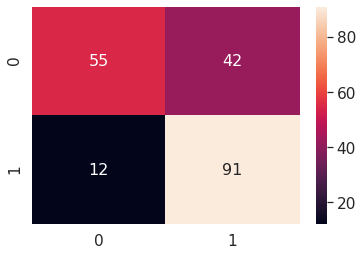

In [0]:
df_cm = pd.DataFrame(Confusion_Matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)